## Proyecto de mentoría *Herramientas de Data Science para dosimetría en medicina nuclear*

### Dataset 1
Encuentre una imagen 2D de medicina nuclear (puede ser de Cámara Gamma o un slice de una imagen de técnicas 3D). La imagen debe haber sido adquirida a distintos instantes de tiempo y debe ser anonimizada antes de su utilización. Se muestra a continuación, un ejemplo de serie de 3 instantes de tiempo en los que se adquirió la misma imagen.

### Dataset 2

Encuentre una imagen 3D, también de medicina nuclear, tomada a distintos instantes de tiempo (4D).

## Consignas

### Parte 1

Realice un análisis exploratorio sobre cada dataset. 

1. Encuentre en cada caso la distribución de los valores de cada pixel y su evolución en el tiempo.
2. Realizar análisis de estadística descriptiva sobre los datos, tanto en una como en múltiples variables. Moda, media, mediana y desviación estándar de un producto en particular.
3. Defina de alguna forma la información que pueda considerarse “ruido” y encuentre outliers.
4. ¿Existe alguna probabilidad condicional entre valores de pixels entre diferentes tiempos de adquisición? ¿Conviene tomar valores de píxeles directamente o es preferible agruparlos en grupos? Justifique.
5. Agrupe en un número que considere aceptable los datos de cada imagen y busque coeficientes de correlación entre grupos del mismo tiempo y grupos de distintos tiempos. Definido un conjunto de píxeles dentro de un grupo en la primera imagen, este grupo de píxeles debe pertenecer al mismo grupo en los tiempos siguientes.
6. Defina un criterio para poder dividir los datos en cada imagen en sub-regiones que pueda considerar “homogéneas”.
7. Grafique, en cada caso de los puntos anteriores, y realice la visualización que considere más óptima. Justifique la elección de la visualización.

### Parte 2

A partir de los resultados obtenindos en la Consigna 1, diagramar una comunicación visual interactiva de los resultados describiendo los aspectos principales del dataset elegido (outliers, ruidos, sub-regiones homogéneas, etc.).

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.

### Dataset 1

In [265]:
%matplotlib inline

import seaborn as sns
import numpy as np 
import pandas as pd 
import pydicom as dicom
import os
import matplotlib.pyplot as plt
import cv2
#import scipy.ndimage
#from skimage import measure, morphology
#from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import SimpleITK as sitk

# Definimos el path en donde están las imágenes
BASE='C:/Users/joaco/Desktop/Mentoría/Imágenes Pedro'
path_1hr = (BASE + '/1h')
path_15hr = (BASE +'/15h')
path_40hr = (BASE +'/40h')
path_64hr = (BASE +'/64h')

# Enlistamos y ordenamos los archivos dicom de cada carpeta
imgs_1hr = os.listdir(path_1hr)
imgs_15hr = os.listdir(path_15hr)
imgs_40hr = os.listdir(path_40hr)
imgs_64hr = os.listdir(path_64hr)

imgs_1hr.sort()
imgs_15hr.sort()
imgs_40hr.sort()
imgs_64hr.sort()
imgs_1hr,imgs_15hr

(['ANT_EM.dcm', 'ANT_SC.dcm', 'POST_EM.dcm', 'POST_SC.dcm', 'nii'],
 ['ANT_EM.dcm', 'ANT_SC.dcm', 'POST_EM.dcm', 'POST_SC.dcm'])

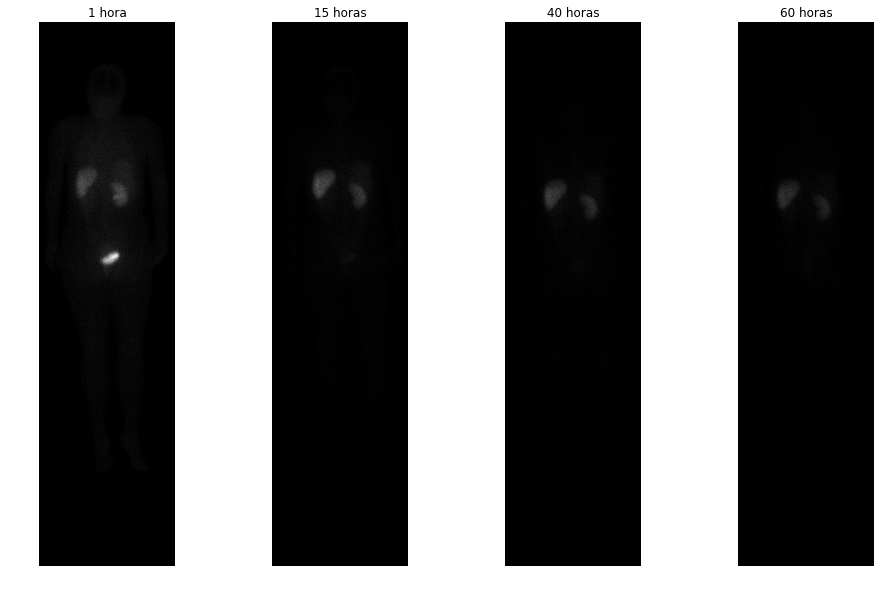

In [355]:
# Cargamos las imágenes de cada tiempo (sólo se usan las post_sc.dcm, que nos parecieron las mejores):

img1_dcm =  dicom.read_file(path_1hr + '/' + imgs_1hr[2])
img1 = img1_dcm.pixel_array

img2_dcm =  dicom.read_file(path_15hr + '/' + imgs_15hr[2])
img2 = img2_dcm.pixel_array

img3_dcm =  dicom.read_file(path_40hr + '/' + imgs_40hr[2])
img3 = img3_dcm.pixel_array

img4_dcm =  dicom.read_file(path_64hr + '/' + imgs_64hr[2])
img4 = img4_dcm.pixel_array

# Graficamos las imágenes seteando el mismo rango de valores en la escala de grises para las tres imágenes
plt.figure(figsize=(16,10))
plt.subplot(141)
plt.imshow(img1, cmap=plt.cm.gray, vmin=0,vmax=553)
plt.title('1 hora')
plt.axis('off')
plt.subplot(142)
plt.imshow(img2, cmap=plt.cm.gray, vmin=0,vmax=553)
plt.title('15 horas')
plt.axis('off')
plt.subplot(143)
plt.imshow(img3, cmap=plt.cm.gray, vmin=0,vmax=553)
plt.title('40 horas')
plt.axis('off')
plt.subplot(144)
plt.imshow(img4, cmap=plt.cm.gray, vmin=0,vmax=553)
plt.title('60 horas')
plt.axis('off')
plt.show()



### Ejercicio 1

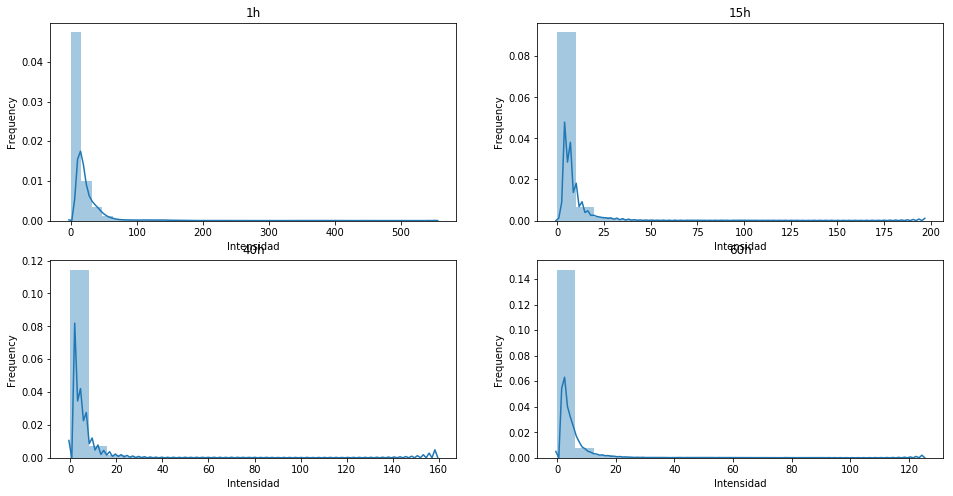

In [267]:
# Analizamos los histogramas de los valores de los pixeles:
plt.figure(figsize=(16,8))

plt.subplot(221)
plt.title('1h')
sns.distplot(img1.flatten(),35)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')

plt.subplot(222)
plt.title('15h')
sns.distplot(img2.flatten(),20)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')

plt.subplot(223)
plt.title('40h')
sns.distplot(img3.flatten(),20)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')

plt.subplot(224)
plt.title('60h')
sns.distplot(img4.flatten(),20)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')
plt.show()

En una primera observación vemos que los histogramas de los valores de intensidad no son muy descriptivos en cuanto a regiones presentes en la imagen, ni distribución de las intensidades relativa al radiofármaco. Quitando los valores cercanos a cero, que podemos entender que se tratan del fondo de la imágen:

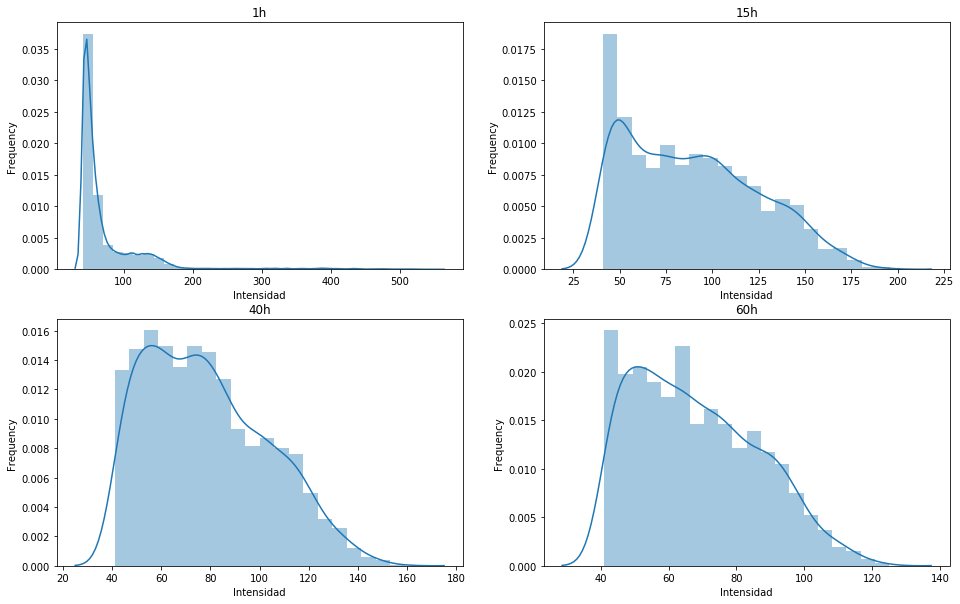

In [268]:
# Analizamos los histogramas de los valores de los pixeles:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.title('1h')
sns.distplot(img1[img1>40].flatten(),35)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')

plt.subplot(222)
plt.title('15h')
sns.distplot(img2[img2>40].flatten(),20)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')

plt.subplot(223)
plt.title('40h')
sns.distplot(img3[img3>40].flatten(),20)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')

plt.subplot(224)
plt.title('60h')
sns.distplot(img4[img4>40].flatten(),20)#,norm_hist=False,kde=False)
plt.ylabel('Frequency')
plt.xlabel('Intensidad')
plt.show()

Se observa como a medida que pasa el tiempo decrece el número de pixcels con intensidades altas presente en la imagen.

##### Dado que el histogramano permite obtener una separación clara de las regiones presentes en la imagen, se generan histogramas en regiones más acotadas.

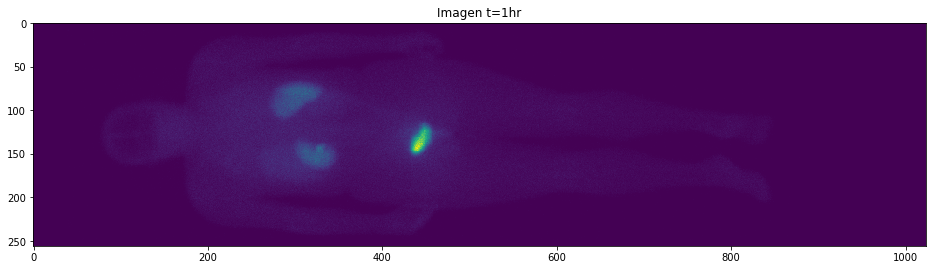

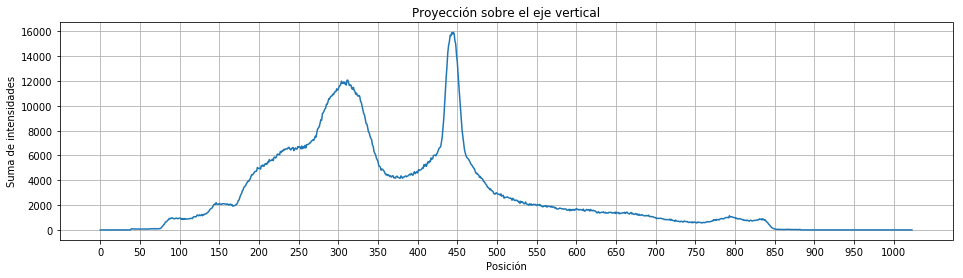

In [269]:
# Se calcula la proyección de la imagen sobre el eje y
proy_y_1_c=np.sum(img1,1)
s=np.shape(proy_y_1_c)

plt.figure(figsize=(16,6))
plt.title('Imagen t=1hr')
plt.imshow(np.transpose(img1[:,:]))

plt.figure(figsize=(16,4))
plt.title('Proyección sobre el eje vertical')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición')
plt.plot(proy_y_1_c)
plt.grid(True)
plt.xticks(np.arange(0, s[0]+1, 50))
plt.show()

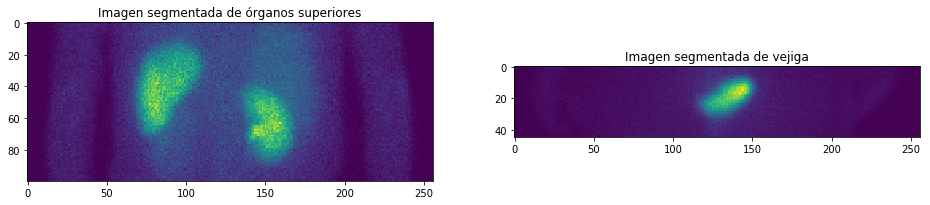

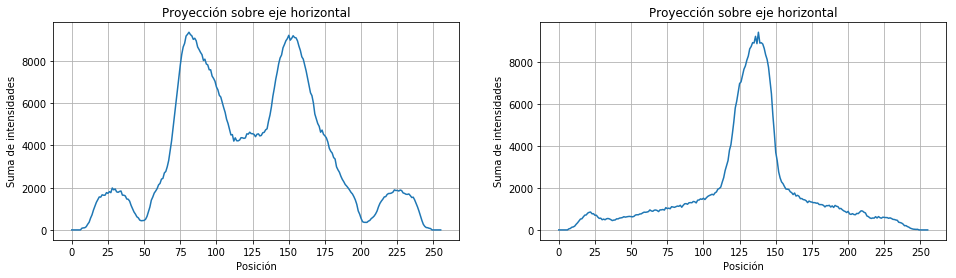

In [270]:
#Recortamos los tramos de mayor intensidad para segmentar los órganos de interes
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title('Imagen segmentada de órganos superiores')
plt.imshow(img1[260:360,:])
plt.subplot(122)
plt.title('Imagen segmentada de vejiga')
plt.imshow(img1[425:470,:])

proy_x_1_o=np.sum(img1[260:360,:],0)
proy_x_1_v=np.sum(img1[425:470,:],0)
s=np.shape(proy_x_1_o)

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(proy_x_1_o)
plt.title('Proyección sobre eje horizontal')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición')
plt.grid(True)
plt.xticks(np.arange(0, s[0]+1, 25))

s=np.shape(proy_x_1_v)
plt.subplot(122)
plt.plot(proy_x_1_v)
plt.grid(True)
plt.xticks(np.arange(0, s[0]+1, 25))
plt.title('Proyección sobre eje horizontal')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición')
plt.show()

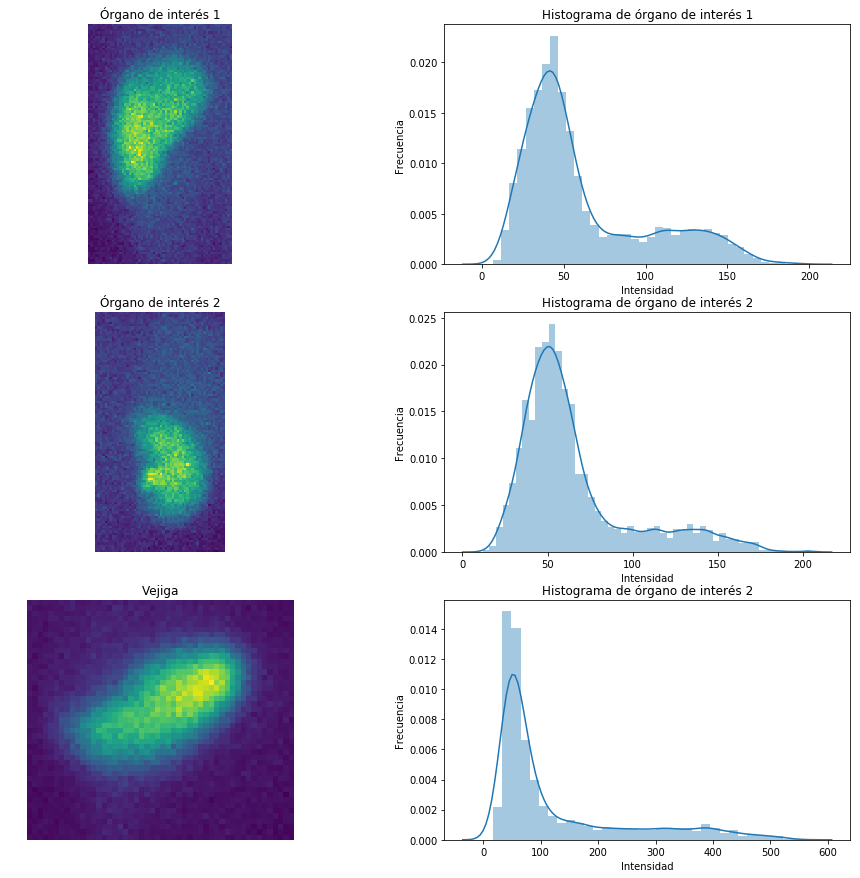

In [271]:
# Nos quedamos con las regiones de interes:

plt.figure(figsize=(16,15))
plt.subplot(321)
plt.title('Órgano de interés 1')
plt.imshow(img1[260:360,60:120])
plt.axis('off')
plt.subplot(322)
sns.distplot(img1[260:360,60:120].flatten())
plt.title('Histograma de órgano de interés 1')
plt.ylabel('Frecuencia')
plt.xlabel('Intensidad')

plt.subplot(323)
plt.title('Órgano de interés 2')
plt.imshow(img1[260:360,121:175])
plt.axis('off')
plt.subplot(324)
sns.distplot(img1[260:360,121:175].flatten())
plt.title('Histograma de órgano de interés 2')
plt.ylabel('Frecuencia')
plt.xlabel('Intensidad')

plt.subplot(325)
plt.title('Vejiga')
plt.imshow(img1[425:470,110:160])
plt.axis('off')
plt.subplot(326)
sns.distplot(img1[425:470,110:160].flatten())
plt.title('Histograma de órgano de interés 2')
plt.ylabel('Frecuencia')
plt.xlabel('Intensidad')
plt.show()

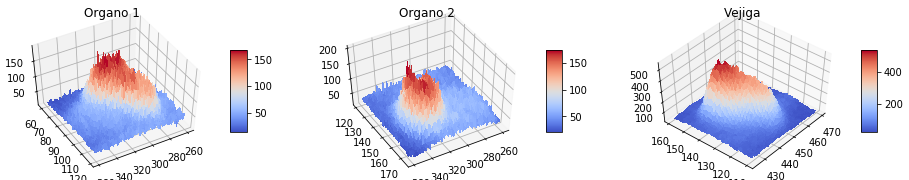

In [353]:

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

fig = plt.figure(figsize=(16,3))

ax = fig.add_subplot(1,3,1,projection='3d')
X = np.arange(260,360,1)
Y = np.arange(60,120,1)
X, Y = np.meshgrid(X, Y)
Z = img1[X,Y]
ax.view_init(50, 60)
plt.title('Organo 1')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax = fig.add_subplot(1,3,2,projection='3d')
X = np.arange(260,360,1)
Y = np.arange(121,175,1)
X, Y = np.meshgrid(X, Y)
Z = img1[X,Y]
ax.view_init(50, 60)
plt.title('Organo 2')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax = fig.add_subplot(1,3,3,projection='3d')
X = np.arange(425,470,1)
Y = np.arange(110,160,1)
X, Y = np.meshgrid(X, Y)
Z = img1[X,Y]
ax.view_init(50, 220)
plt.title('Vejiga')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


#### De la información adquirida en los gráficos anteriores, se separa la imagen en 4 categorías constituyentes: Fondo, Cuerpo, Órganos target del radiofármaco, Vejiga

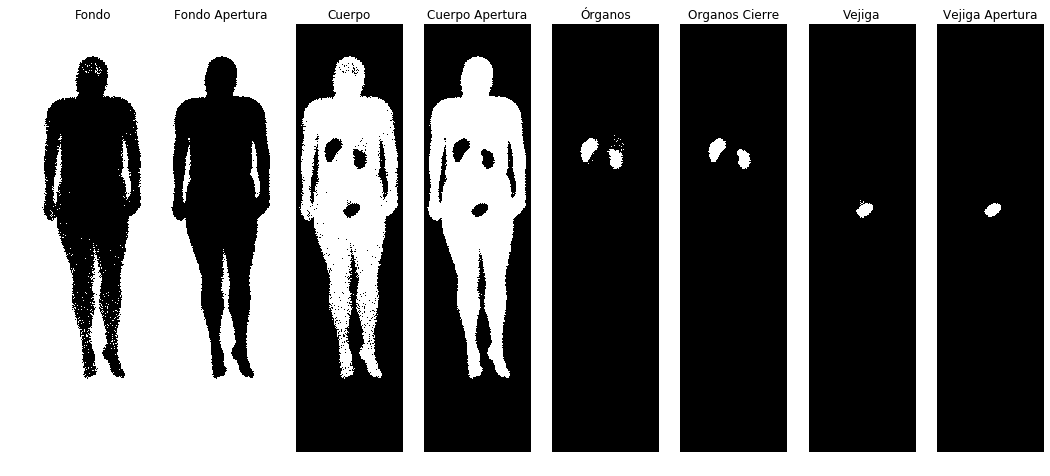

In [272]:
# Separamos la imagen en 4 categorías constituyentes: Fondo, Cuerpo, Órganos target del radiofármaco, Vejiga.

fondo = img1.copy()
cuerpo = img1.copy()
organos = img1.copy()
vejiga = img1.copy()

fondo[fondo<7]=1  
fondo[fondo>=7]=0

cuerpo[cuerpo<7]=0
cuerpo[cuerpo>75]=0
cuerpo[cuerpo!=0]=1

organos[organos<75]=0
organos[organos>=75]=1
vejiga=organos.copy()
organos[400:,:]=0
vejiga[0:400,:]=0

# Se muestra en blanco cada una de las regiones seleccionadas y negro el resto de las regiones.

plt.figure(figsize=(18,25))

plt.subplot(181)
plt.title('Fondo')
plt.imshow(fondo, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(183)
plt.title('Cuerpo')
plt.imshow(cuerpo, cmap=plt.cm.gray)
plt.axis('off')
#
plt.subplot(185)
plt.title('Órganos')
plt.imshow(organos, cmap=plt.cm.gray)
plt.axis('off')
#
plt.subplot(187)
plt.title('Vejiga')
plt.imshow(vejiga, cmap=plt.cm.gray)
plt.axis('off')

# Para dejar regiones más simples segmentadas, se realizan opraciones de cierre y apertura. 

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fondo = cv2.morphologyEx(fondo, cv2.MORPH_OPEN, kernel)
organos = cv2.morphologyEx(organos, cv2.MORPH_OPEN, kernel)
cuerpo = cv2.morphologyEx(cuerpo, cv2.MORPH_CLOSE, kernel)
vejiga = cv2.morphologyEx(vejiga, cv2.MORPH_OPEN, kernel)

plt.subplot(182)
plt.title('Fondo Apertura')
plt.imshow(fondo, cmap=plt.cm.gray)
plt.axis('off')
#
plt.subplot(184)
plt.title('Cuerpo Apertura')
plt.imshow(cuerpo, cmap=plt.cm.gray)
plt.axis('off')
#
plt.subplot(186)
plt.title('Organos Cierre')
plt.imshow(organos, cmap=plt.cm.gray)
plt.axis('off')
#
plt.subplot(188)
plt.title('Vejiga Apertura')
plt.imshow(vejiga, cmap=plt.cm.gray)
plt.axis('off')

# Creamos máscaras lógicas de cada región
m1=fondo>0
m2=cuerpo>0
m3=organos>0
m4=vejiga>0



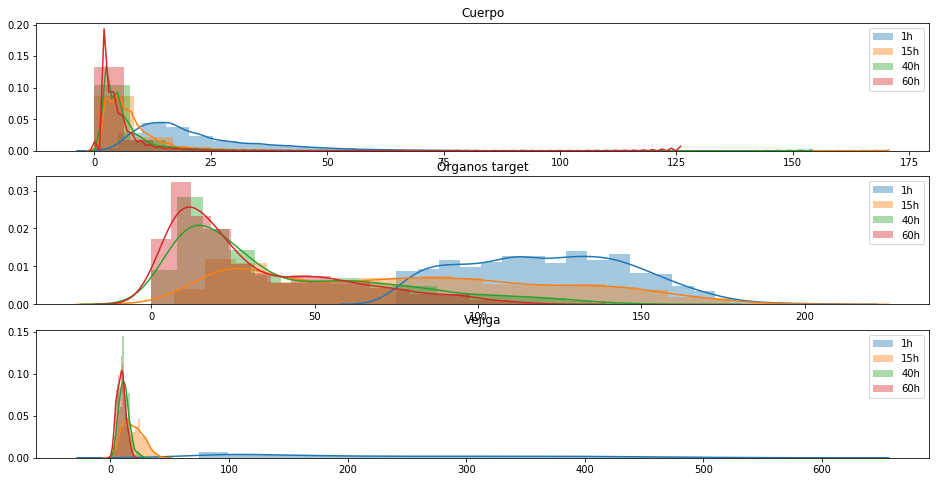

In [273]:
# Para tener una idea más clara de la evolución del valor de los pixeles a lo alrgo del tiempo 
# graficamos loshistogramas por regiones superponiendo los distintos tiempos.

plt.figure(figsize=(16,8))
plt.subplot(311)
plt.title('Cuerpo')
sns.distplot(img1[m2].flatten(),20)
sns.distplot(img2[m2].flatten(),20)
sns.distplot(img3[m2].flatten(),20)
sns.distplot(img4[m2].flatten(),20)
plt.legend(['1h','15h','40h','60h'])

plt.subplot(312)
plt.title('Órganos target')
sns.distplot(img1[m3].flatten(),20)
sns.distplot(img2[m3].flatten(),20)
sns.distplot(img3[m3].flatten(),20)
sns.distplot(img4[m3].flatten(),20)
plt.legend(['1h','15h','40h','60h'])

plt.subplot(313)
plt.title('Vejiga')
sns.distplot(img1[m4].flatten(),20)
sns.distplot(img2[m4].flatten(),20)
sns.distplot(img3[m4].flatten(),20)
sns.distplot(img4[m4].flatten(),20)
plt.legend(['1h','15h','40h','60h'])
plt.show()

Se orserva (fundamentalemente en los dos últimos histogramas) que con el paso del tiempo hay un viraje de los pixeles en la región considerada desde intensidades altas hacia las bajas. 

Se puede ver en la superposición de histogramas que ese pasaje es progresivo. Por ejemplo en el caso de los órganos target, vemos en azul que todos los pixeles en la región tenían valores superiores a 75 y menores a 200. Luego a las 15hs el naranja nos muestra como van apareciendo pixeles de bajas intensidades disminuyendo los de altas en número. A las 40hs ya directamente las intensiaddes no superan los 170 aproximadamente, y crece marcadamente el número de pixeles de 0 a 50. Finalmente en rojo las intensidasdes no superan el 150. 

El histograma de la vejiga muestra que casi la totalidad de los pixeles se mueven a valores muy bajos después de la primera imagen, abadonando los valores altos por completo. Esto se peude deber a que el paciente fue al baño.

Se observa el fenómeno previsto, pues la intensidad (debida al radiofármaco) disminuye a medida que este es metabolizado y a medida que decae.


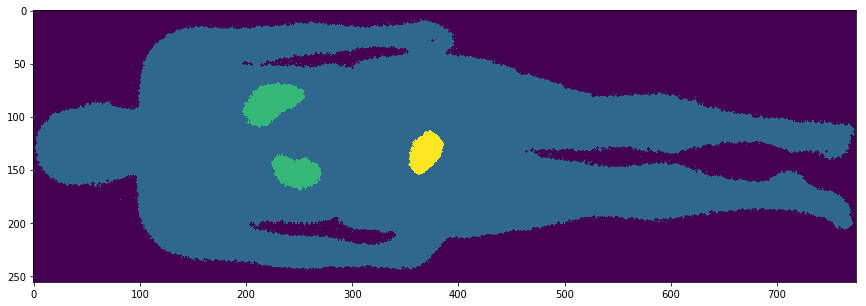

In [274]:
# Creamos una sola imagen que contiene las etiquetas de cada región:

labels = cuerpo.copy()*1;
labels[m3]=2;
labels[m4]=3;
plt.figure(figsize=(20,5))
plt.imshow(np.transpose(labels[75:850,:]))
#plt.axis('off')
plt.show()

### Ejercicio 2

#### Para aplicar conceptos vistos en la materia y facilitar calculos posteriores se transformaron las imágenes a un pandas Data Frame

In [281]:
import numpy.matlib
s=np.shape(labels)
a=np.asarray(np.arange(0,s[0],1))
a=np.matlib.repmat(a,s[1],1)
a=np.transpose(a)
y=a.flatten()

b=np.asarray(np.arange(0,s[1],1))
b=np.matlib.repmat(b,s[0],1)
x=b.flatten()

label_flat=labels.flatten()
int1_flat=img1.flatten()
int2_flat=img2.flatten()
int3_flat=img3.flatten()
int4_flat=img4.flatten()
l=np.shape(int_flat)
tiempo=np.zeros(l[0])
tiempo1=tiempo+1
tiempo2=tiempo+15
tiempo3=tiempo+40
tiempo4=tiempo+60

Dosis_1=pd.DataFrame(columns=['x','y','Intensidad','Etiqueta','Tiempo'])
Dosis_1['x']=x
Dosis_1['y']=y
Dosis_1['Intensidad']=int1_flat
Dosis_1['Etiqueta']=label_flat
Dosis_1['Tiempo']=tiempo1

Dosis_2=pd.DataFrame(columns=['x','y','Intensidad','Etiqueta','Tiempo'])
Dosis_2['x']=x
Dosis_2['y']=y
Dosis_2['Intensidad']=int2_flat
Dosis_2['Etiqueta']=label_flat
Dosis_2['Tiempo']=tiempo2

Dosis_3=pd.DataFrame(columns=['x','y','Intensidad','Etiqueta','Tiempo'])
Dosis_3['x']=x
Dosis_3['y']=y
Dosis_3['Intensidad']=int3_flat
Dosis_3['Etiqueta']=label_flat
Dosis_3['Tiempo']=tiempo3

Dosis_4=pd.DataFrame(columns=['x','y','Intensidad','Etiqueta','Tiempo'])
Dosis_4['x']=x
Dosis_4['y']=y
Dosis_4['Intensidad']=int4_flat
Dosis_4['Etiqueta']=label_flat
Dosis_4['Tiempo']=tiempo4

d={0: 'fondo',1: 'cuerpo',2: 'organos',3: 'vejiga'}

frames = [Dosis_1,Dosis_2,Dosis_3,Dosis_4]
Dosis_b = pd.concat(frames)
Dosis_b=Dosis_b.replace({"Etiqueta": d})

Dosis_b.to_pickle('Dosis_database_b')
#Dosis = pd.read_pickle('Dosis_database')


In [321]:
# Calculamos los valores del resumen estadístico:

Fondo=[Dosis_b[(Dosis_b.Tiempo==1) & (Dosis_b.Etiqueta=='fondo')].Intensidad.describe().to_frame().transpose(),
       Dosis_b[(Dosis_b.Tiempo==15) & (Dosis_b.Etiqueta=='fondo')].Intensidad.describe().to_frame().transpose(),
       Dosis_b[(Dosis_b.Tiempo==40) & (Dosis_b.Etiqueta=='fondo')].Intensidad.describe().to_frame().transpose(),
       Dosis_b[(Dosis_b.Tiempo==60) & (Dosis_b.Etiqueta=='fondo')].Intensidad.describe().to_frame().transpose()]
Fondo = pd.concat(Fondo)
Cuerpo=[Dosis_b[(Dosis_b.Tiempo==1) & (Dosis_b.Etiqueta=='cuerpo')].Intensidad.describe().to_frame().transpose(),
        Dosis_b[(Dosis_b.Tiempo==15) & (Dosis_b.Etiqueta=='cuerpo')].Intensidad.describe().to_frame().transpose(),
        Dosis_b[(Dosis_b.Tiempo==40) & (Dosis_b.Etiqueta=='cuerpo')].Intensidad.describe().to_frame().transpose(),
        Dosis_b[(Dosis_b.Tiempo==60) & (Dosis_b.Etiqueta=='cuerpo')].Intensidad.describe().to_frame().transpose()]
Cuerpo = pd.concat(Cuerpo)
Organos=[Dosis_b[(Dosis_b.Tiempo==1) & (Dosis_b.Etiqueta=='organos')].Intensidad.describe().to_frame().transpose(),
         Dosis_b[(Dosis_b.Tiempo==15) & (Dosis_b.Etiqueta=='organos')].Intensidad.describe().to_frame().transpose(),
         Dosis_b[(Dosis_b.Tiempo==40) & (Dosis_b.Etiqueta=='organos')].Intensidad.describe().to_frame().transpose(),
         Dosis_b[(Dosis_b.Tiempo==60) & (Dosis_b.Etiqueta=='organos')].Intensidad.describe().to_frame().transpose()]
Organos = pd.concat(Organos)
Vejiga=[Dosis_b[(Dosis_b.Tiempo==1) & (Dosis_b.Etiqueta=='vejiga')].Intensidad.describe().to_frame().transpose(),
        Dosis_b[(Dosis_b.Tiempo==15) & (Dosis_b.Etiqueta=='vejiga')].Intensidad.describe().to_frame().transpose(),
        Dosis_b[(Dosis_b.Tiempo==40) & (Dosis_b.Etiqueta=='vejiga')].Intensidad.describe().to_frame().transpose(),
        Dosis_b[(Dosis_b.Tiempo==60) & (Dosis_b.Etiqueta=='vejiga')].Intensidad.describe().to_frame().transpose()]
Vejiga = pd.concat(Vejiga)

Fondo.index=[1,15,40,60]
Cuerpo.index=[1,15,40,60]
Organos.index=[1,15,40,60]
Vejiga.index=[1,15,40,60]

Fondo

,count,mean,std,min,25%,50%,75%,max
1,156550.0,0.404414,0.947878,0.0,0.0,0.0,0.0,6.0
15,156550.0,0.411479,1.227077,0.0,0.0,0.0,0.0,20.0
40,156550.0,0.285142,0.830930,0.0,0.0,0.0,0.0,14.0
60,156550.0,0.223711,0.665438,0.0,0.0,0.0,0.0,11.0


In [322]:
Cuerpo

,count,mean,std,min,25%,50%,75%,max
1,102057.0,22.024751,13.568306,0.0,12.0,18.0,28.0,99.0
15,102057.0,7.696287,11.626790,0.0,2.0,5.0,9.0,169.0
40,102057.0,6.045034,11.713562,0.0,1.0,3.0,6.0,153.0
60,102057.0,4.724673,9.531950,0.0,1.0,2.0,5.0,125.0


In [323]:
Organos

,count,mean,std,min,25%,50%,75%,max
1,2623.0,121.247808,26.058411,75.0,100.0,121.0,141.0,205.0
15,2623.0,78.231033,45.189296,7.0,35.0,76.0,113.5,196.0
40,2623.0,39.212352,32.527620,0.0,14.0,26.0,60.0,159.0
60,2623.0,30.993900,25.937626,0.0,11.0,21.0,47.0,122.0


In [324]:
Vejiga

,count,mean,std,min,25%,50%,75%,max
1,914.0,229.780088,126.920717,75.0,112.0,198.0,335.0,553.0
15,914.0,18.856674,8.367269,1.0,12.0,18.0,25.0,45.0
40,914.0,11.586433,4.390779,2.0,8.0,11.0,14.0,28.0
60,914.0,9.135667,3.655058,1.0,6.0,9.0,12.0,20.0


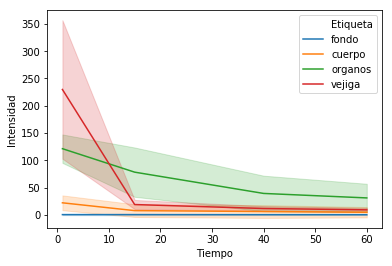

In [387]:
means=[Dosis_b[(Dosis_b.Tiempo==1) & (Dosis_b.Etiqueta=='organos')].Intensidad.mean(),
         Dosis_b[(Dosis_b.Tiempo==15) & (Dosis_b.Etiqueta=='organos')].Intensidad.mean(),
         Dosis_b[(Dosis_b.Tiempo==40) & (Dosis_b.Etiqueta=='organos')].Intensidad.mean(),
         Dosis_b[(Dosis_b.Tiempo==60) & (Dosis_b.Etiqueta=='organos')].Intensidad.mean()]

sns.lineplot(x=Dosis_b.Tiempo, y=Dosis_b.Intensidad,hue=Dosis_b.Etiqueta, estimator='mean',ci='sd')
plt.show()

## AGREGAR ALGUNA CONCLUSIÓN 

### Ejercicio 3

### Definición de ruido:
Son aquellos pixeles cuya intensidad en la región escapa a 1.5 veces el rango intercuartílico, es decir los outliers. En términos prácticos, son aquellos pixeles que tienen intensidades 'mucho' menores o mayores a los esperables en la región y por lo tanto puden deberse a 'ruido' o artefactos en la adquisición.

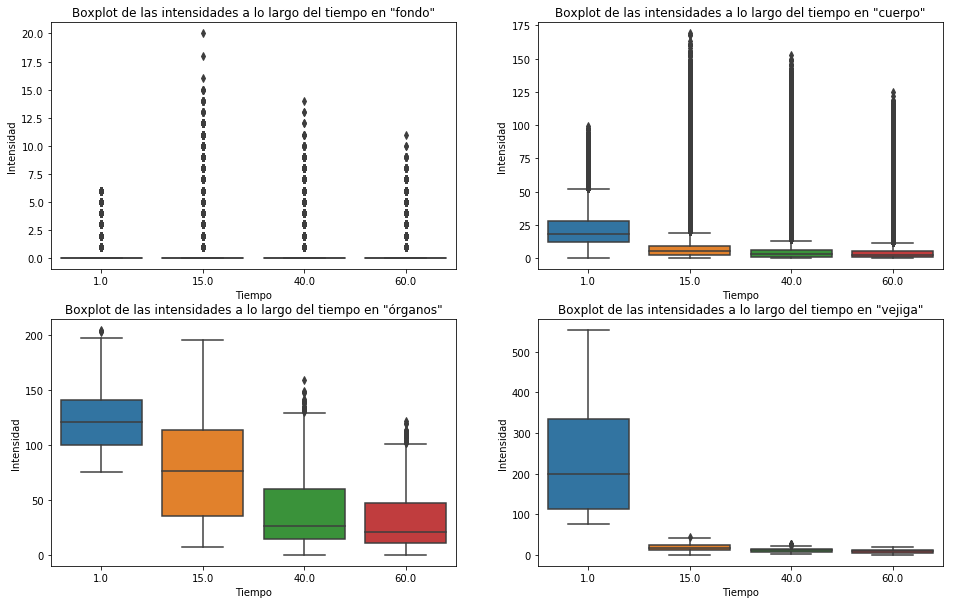

In [295]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('Boxplot de las intensidades a lo largo del tiempo en "fondo"')
sns.boxplot(x='Tiempo', y='Intensidad', data=Dosis_b[Dosis_b.Etiqueta=='fondo'], whis=1.5)

plt.subplot(222)
plt.title('Boxplot de las intensidades a lo largo del tiempo en "cuerpo"')
sns.boxplot(x='Tiempo', y='Intensidad', data=Dosis_b[Dosis_b.Etiqueta=='cuerpo'], whis=1.5)

plt.subplot(223)
plt.title('Boxplot de las intensidades a lo largo del tiempo en "órganos"')
sns.boxplot(x='Tiempo', y='Intensidad', data=Dosis_b[Dosis_b.Etiqueta=='organos'], whis=1.5)

plt.subplot(224)
plt.title('Boxplot de las intensidades a lo largo del tiempo en "vejiga"')
sns.boxplot(x='Tiempo', y='Intensidad', data=Dosis_b[Dosis_b.Etiqueta=='vejiga'], whis=1.5)
plt.show()

### Ejercicio 4

¿Existe alguna probabilidad condicional entre valores de pixels entre diferentes tiempos de adquisición? ¿Conviene tomar valores de píxeles directamente o es preferible agruparlos en grupos? Justifique.


Conviene agrupar los pixeles y en todo caso obtener un valor representativo del grupo, ya que es muy dificil garantizar un registrado perfecto de las imágenes. Por esta razón, un pixel (x,y) en el el tiempo t1, no necesariamente se corresponda con el mismo tejido/elemento del cuerpo en en el instante t2.

Existe una probabilidad condicional de que dada una región con una intensidad I el tiempo t1, la intensidad del tiempo t2 siguiente está condicionada por la primera, y estas se relaciónan con el decaimiento del raadiofármaco.

### VER COMO LO PROBAMOS

### Ejercicio 5

In [ ]:
## Creamos una sola imagen con 4 capas que tiene los 4 tiempos.
#s=np.shape(labels)
#imagenes=np.zeros((s[0],s[1],4))
#imagenes[:,:,0]=img1
#imagenes[:,:,1]=img2
#imagenes[:,:,2]=img3
#imagenes[:,:,3]=img4
#
## Construimos un dataframe de todos los valores de los pixeles, con las siguientes columnas:
#Dosis=pd.DataFrame(columns=['x','y','Intesidad','Etiqueta','Tiempo'])
#
#d={'0': 'fondo','1': 'cuerpo','2': 'organos','3': 'vejiga'}
#t={'0': 1,'1': 15,'2': 40,'3': 60}
#k=0
#for z in range(4):
#    for y in range(s[0]):
#        for x in range(s[1]):
#            Dosis.loc[k]=[y,x,imagenes[y,x,z],d[str(labels[y,x])],t[str(z)]]
#            k=k+1

In [64]:
#Dosis.to_pickle('Dosis_database')
#Dosis = pd.read_pickle('Dosis_database')

In [296]:
#Dosis[Dosis['Tiempo']==40].describe()
#Dosis[0:500]